In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as plticker
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

<a id='toc'></a>

### Table of Contents:
#### <a href='#q1'>Question 1</a>
#### <a href='#q1a'>Question 1 Answer</a>

#### <a href='#q2'>Question 2</a>
#### <a href='#q2a'>Question 2 Answer</a>

#### <a href='#q3'>Question 3</a>
#### <a href='#q3a'>Question 3 Answer</a>

#### <a href='#q4'>Question 4</a>
#### <a href='#q4a'>Question 4 Answer</a>

#### <a href='#q5'>Question 5</a>
#### <a href='#q5a'>Question 5 Answer</a>

#### <a href='#q6'>Question 6 and Answer</a>

#### <a href='#q7'>Question 7 and Answer</a>

#### <a href='#q8'>Question 8 and Answer</a>

_____

#### Gathering the data into dataframes.

In [72]:
work_book = r'C:\Users\Kerling\Desktop\IDEXX Sales Analytics Benchmark\CensusData.xlsx'

employment = pd.read_excel(open(work_book,'rb'),sheet_name = 0, skiprows=1809)  # Pull only 2010 and onward from excel
exports = pd.read_excel(open(work_book,'rb'),sheet_name = 2, skiprows=4)  # Pull data from excel

# Abrieviated column names
employment.columns.values[:] = [
    "FIPS", "State", "Year", 'CNI - Pop', "CLF - Tot",
    "CLF - %", "CLF - Emp - Tot", "CLF - Emp - %", "CLF - Unemp - Tot", "CLF - Unemp - Rate"
]
# Cleaning up 
exports.rename(columns={'Time':'Year'}, inplace=True)
exports = exports.drop(exports[exports['State'] == "Unknown"].index)
exports = exports.drop(exports[exports['State'] == "US Virgin Islands"].index)
exports = exports.drop(exports[exports['State'] == "Puerto Rico"].index)

# Sales region info
sales_regions = pd.read_csv('SalesRegions.txt', sep=",")
sales_regions.rename(columns={'State':'StateCode'}, inplace=True)
state_codes = pd.read_excel(open(work_book,'rb'),sheet_name = 1)  # Pull data from excel
state_codes.rename(columns={'Name':'State'}, inplace=True)

states_regions_codes = pd.merge(state_codes, sales_regions, how='right', on=['StateCode'])

#### Previewing the three tables

In [73]:
employment.head(5)

,FIPS,State,Year,CNI - Pop,CLF - Tot,CLF - %,CLF - Emp - Tot,CLF - Emp - %,CLF - Unemp - Tot,CLF - Unemp - Rate
0,1,Alabama,2010,3690182,2196042,59.5,1964559,53.2,231483,10.5
1,2,Alaska,2010,518544,361913,69.8,333416,64.3,28497,7.9
2,4,Arizona,2010,4895922,3089705,63.1,2769454,56.6,320251,10.4
3,5,Arkansas,2010,2232453,1353338,60.6,1242496,55.7,110842,8.2
4,6,California,2010,28539868,18336271,64.2,16091945,56.4,2244326,12.2


In [74]:
exports.head(5)

,State,Commodity,Year,Total Value ($US)
0,Alabama,01 Live Animals,2010,71964594
1,Alabama,01 Live Animals,2011,74358745
2,Alabama,01 Live Animals,2012,75617950
3,Alabama,01 Live Animals,2013,79349747
4,Alabama,01 Live Animals,2014,75114302


In [75]:
states_regions_codes.head(5)

,StateCode,State,SalesRegion
0,AA,Armed Forces America,South Florida
1,AK,Alaska,Northwest
2,AL,Alabama,Gulf Coast
3,AR,Arkansas,Memphis
4,AZ,Arizona,Southwest


------
<a id='q1'></a>

### Question 1

In [18]:
exports_year = exports.groupby('Year').sum().reset_index()  # new dataframe of just year and total export value 
employment_year = employment[["CLF - Unemp - Rate", 'Year']].groupby(['Year']).mean().reset_index()  # new dataframe of year mean unemp rate
exports_employment_year = pd.merge(employment_year, exports_year, how='right', on=['Year'])  # merging dataframe on year

# exporting CSV of table for tableau graphing as well
exports_employment_year.to_csv(r'C:\Users\Kerling\Desktop\IDEXX Sales Analytics Benchmark\exports_employment_year_q1.csv')

Resulting dataframe contains Year, CLF Unemployment Rate, and Total Value ($US) of exports per year

In [244]:
exports_employment_year

,Year,CLF - Unemp - Rate,Total Value ($US)
0,2010,8.845283,1206597950375
1,2011,8.256604,1415583465054
2,2012,7.471698,1476299533000
3,2013,6.860377,1507156942565
4,2014,5.860377,1550223788762
5,2015,5.090566,1435136088597
6,2016,4.692453,1383744079691
7,2017,4.215094,1479336093036


Plotting the Data

Slope and rsquared of Exports over Time: 19875554580.95 0.21
Slope and rsquared of Unemployment over Time: -0.69 0.99


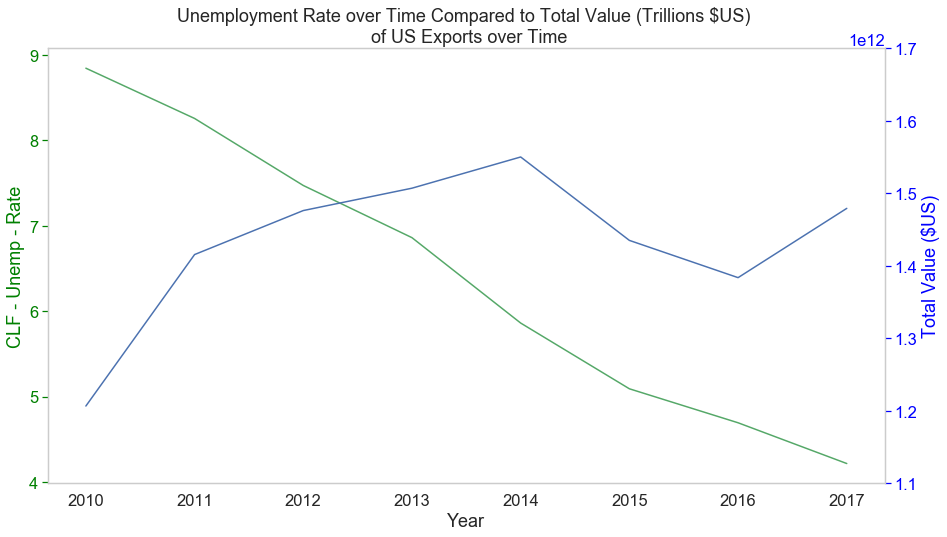

In [51]:
# grabbing slope and rvalue of two lines. The rest of the values returned in linregress are unemportant os get junk vars
slope_export,i,r_export,p,s = st.linregress(exports_employment_year['Year'],exports_employment_year['Total Value ($US)'])
print("Slope and rsquared of Exports over Time:", round(slope_export,2), round(r_export**2,2))

slope_unemp,i,r_unemp,p,s = st.linregress(exports_employment_year['Year'],exports_employment_year['CLF - Unemp - Rate'])
print("Slope and rsquared of Unemployment over Time:", round(slope_unemp,2), round(r_unemp**2,2))

fig,ax = plt.subplots()
ax.set(title='Unemployment Rate over Time Compared to Total Value (Trillions $US) \n of US Exports over Time')
sns.lineplot(x = 'Year', y = 'CLF - Unemp - Rate',data=exports_employment_year, color="g")  # unemp rate
ax.grid(None)
ax.yaxis.label.set_color('green')
ax.tick_params(axis='y', colors='green')

ax2 = plt.twinx()
sns.lineplot(x = 'Year', y = 'Total Value ($US)',data=exports_employment_year, color="b").set_ylim(1.1e12,1.7e12)  # exports
ax2.grid(None)
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')
plt.show()

<a id='q1a'></a>
### Q1 Answer:

Total Value over Time has an rsquared of 0.21, and a positive slope. CLF Unemployment over Time has an rsquared of 0.99 and a negative slope. So it could be said that there is an inverse relationship between the unemployement rate and the total values of exports. The unemployment rate has declined with each year since 2010, while the value of exports has bounced around, while trending upwards. With more data a more definitive answer could be given, as it may be too soon to tell with only 8 years to look at.

### Tableau Graph
I also created the graph in Tableau, and used the 'Create Calculated Field' tool to insert the rsquared into the title.

<img src="q1.png">

#### <a href='#toc'>Back to Table of Contents</a>
-----

<a id='q2'></a>
### Q2

In [151]:
year_state_sum_value = exports[['State','Total Value ($US)','Year']].groupby(['State','Year']).sum().reset_index()
year_state_pop = employment[['State','CNI - Pop', 'CLF - Tot', 'Year']].groupby(['State','Year']).sum().reset_index()
pop_sum = pd.merge(year_state_pop, year_state_sum_value, how='right', on=['State','Year'])

# exporting CSV of table for tableau graphing as well
pop_sum.to_csv(r'C:\Users\Kerling\Desktop\IDEXX Sales Analytics Benchmark\pop_sum_q2.csv')

print(len(pop_sum))
pop_sum.head(5)

400


,State,Year,CNI - Pop,CLF - Tot,Total Value ($US)
0,Alabama,2010,3690182,2196042,15495257436
1,Alabama,2011,3724211,2202670,17927675723
2,Alabama,2012,3743453,2176337,19576975820
3,Alabama,2013,3762759,2174000,19301321716
4,Alabama,2014,3779774,2161618,19450396592


Plotting the data

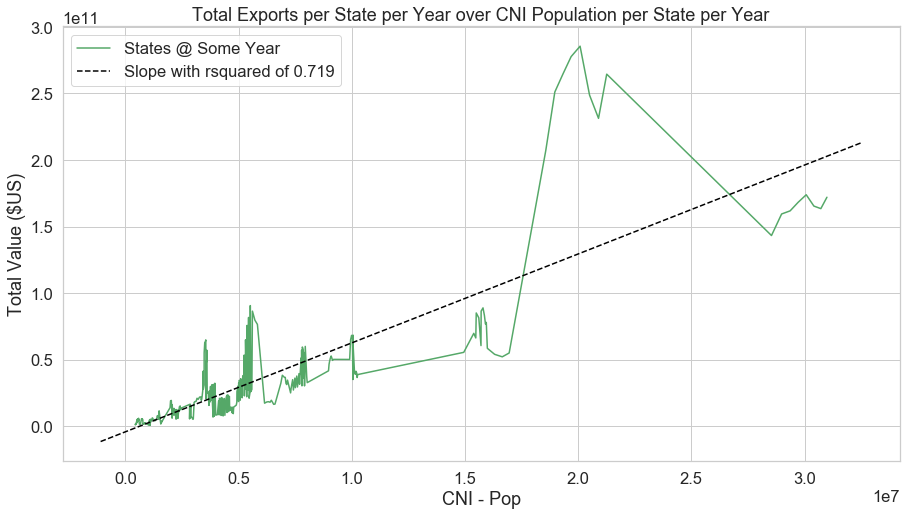

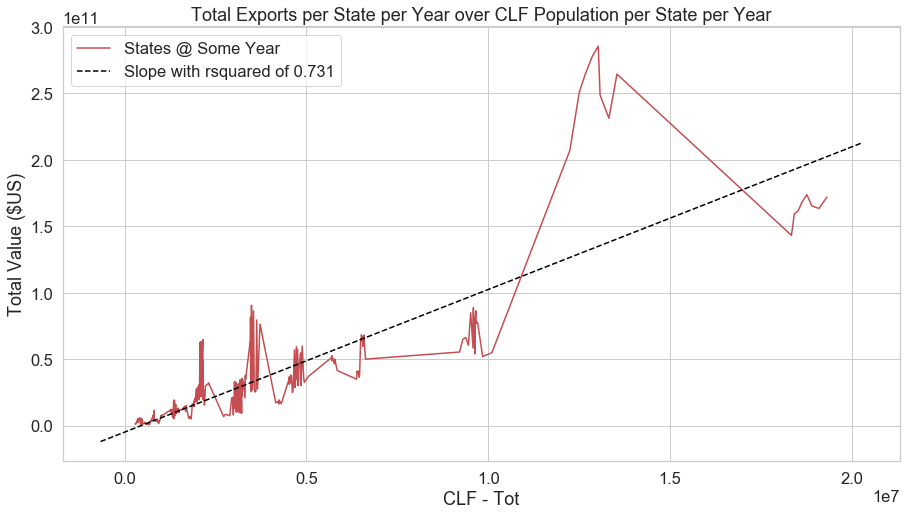

In [114]:
def abline(x,y):
    """Plot a line from slope and intercept"""
    slope,intercept,rvalue,p,s = st.linregress(x,y)
    rsquared = round(rvalue**2,3)
    
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c = 'black', label = "Slope with rsquared of %s" % rsquared)

####
ax = sns.lineplot(x = 'CNI - Pop', y = 'Total Value ($US)',data=pop_sum, color="g", label = 'States @ Some Year')
abline(pop_sum['CNI - Pop'],pop_sum['Total Value ($US)'])
ax.set_title("Total Exports per State per Year over CNI Population per State per Year")
ax.legend(loc = 2)
plt.show()

######
ax = sns.lineplot(x = 'CLF - Tot', y = 'Total Value ($US)',data=pop_sum, color="r", label = 'States @ Some Year')
abline(pop_sum['CLF - Tot'],pop_sum['Total Value ($US)'])
ax.set_title("Total Exports per State per Year over CLF Population per State per Year")
ax.legend(loc =2)
plt.show()

<a id='q2a'></a>
### Q2 Answer:

For both CLF Total and CNI Total there is definitely a relationship between population and total vlaue of exports, seen in both the python graphs (above), and the tableau graphs (two graphs below). CLF population gives the highest rsquared at a value 0.731, and CNI population gives an rsquared of 0.719. 

I graphed the data in both scatter and line to illustrate that even though the total dataset trends upwards, on a state by state level the data tells a slightly different story. The highest peak in Total Values is Texas (plotted right below), these values rise and fall as the CNI population increases, giving an rsquared of only 0.288, showing that the story being told depends on the resolution of the data.

rsquared for Texas data: 0.288


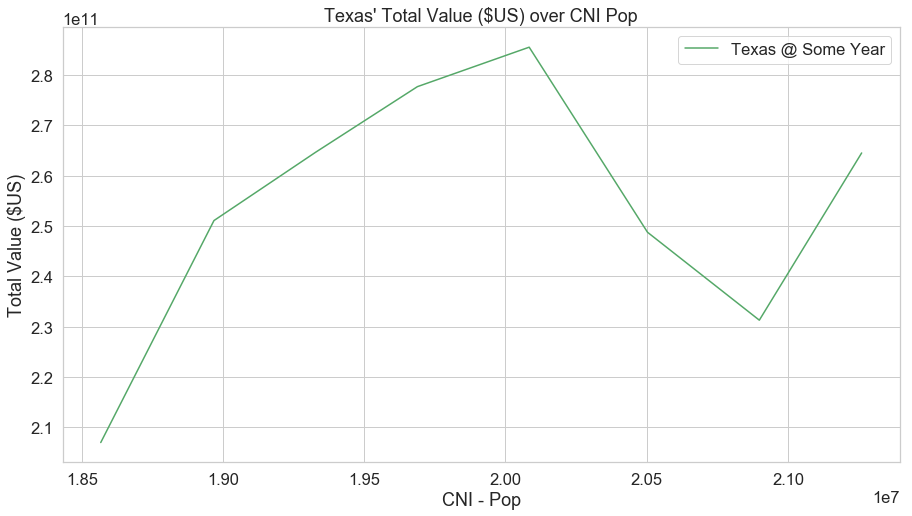

In [124]:
texas = pop_sum[pop_sum['State'] == 'Texas']

print("rsquared for Texas data:",round(np.corrcoef(texas['CNI - Pop'],texas['Total Value ($US)'])[0,1],3))
sns.lineplot(x = 'CNI - Pop', y = 'Total Value ($US)',data=texas, color="g", label = 'Texas @ Some Year')
plt.title("Texas' Total Value ($US) over CNI Pop")
plt.show()

### Tableau Graph
Same as for Q1, I also created the graph in Tableau as a scatter plot, and used the 'Create Calculated Field' tool to insert the rsquared into the title. The Texas only chart could also be made in Tableau by creating a State filter.

<img src="q2.png">

#### <a href='#toc'>Back to Table of Contents</a>
-----
<a id='q3'></a>
### Q3

In [245]:
# Two dataframes need to be created. One Containing State, Commodity, Total Value, and a new column for Commodity %
# Another containing State and Total Sum of Commodities

state_commodity = exports[['State','Commodity',
                  'Total Value ($US)']].groupby(
                ['State','Commodity']).sum().reset_index()

state_commodity["Commodity %"] = None  # adding empty column
total_sums = state_commodity.groupby(['State']).sum().reset_index()

In [129]:
state_commodity.head(4)

,State,Commodity,Total Value ($US),Commodity Percent of Total Value
0,Alabama,01 Live Animals,493969891,None
1,Alabama,02 Meat And Edible Meat Offal,2415678530,None
2,Alabama,"03 Fish, Crustaceans & Aquatic Invertebrates",24699750,None
3,Alabama,04 Dairy Prods; Birds Eggs; Honey; Ed Animal P...,108319194,None


In [130]:
total_sums.head(4)

,State,Total Value ($US)
0,Alabama,153331292937
1,Alaska,37508950200
2,Arizona,158309913466
3,Arkansas,50299721827


Calculating the commodity with the highest % of the total for each state

In [147]:
for index, row in state_commodity.iterrows(): # iterates through dataframe   
    # calculating the % each commodity is of the total for each state
    _temp = float(row['Total Value ($US)']/total_sums['Total Value ($US)'].loc[total_sums['State'] == row['State']].item()*100)  
    state_commodity.at[index,'Commodity %'] = _temp
    
# new dataframe for highest commodity %
highest_commodity = state_commodity[['State']].groupby(['State']).sum().reset_index()
highest_commodity['Commodity'] = None
highest_commodity['Commodity %'] = None


for index, row in test.iterrows():
    # calculating each States' highest commodity %
    state = state_commodity[state_commodity["State"] == row['State']].sort_values('Total Value ($US)',ascending = False)
    highest_commodity.at[index,'Commodity'] = state[['Commodity']].head(1).iloc[0]['Commodity']
    highest_commodity.at[index,'Commodity %'] = state[['Commodity %']].head(1).iloc[0]['Commodity %']


As we can see below, Wyoming has the highest % of total for one commodity.

In [156]:
# State with highest % towards one commodity
commodity_unemp.sort_values(['Commodity %'],ascending=False).head(5)

,State,Commodity,Commodity %,CLF - Unemp - Rate
49,Wyoming,28 Inorg Chem; Prec & Rare-earth Met & Radioac...,68.2128,5.0125
44,Vermont,85 Electric Machinery Etc; Sound Equip; Tv Equ...,63.2051,4.3500
46,Washington,"88 Aircraft, Spacecraft, And Parts Thereof",52.5427,7.0375
27,Nevada,"71 Nat Etc Pearls, Prec Etc Stones, Pr Met Etc...",52.3746,9.0875
47,West Virginia,"27 Mineral Fuel, Oil Etc.; Bitumin Subst; Mine...",49.3963,6.9625


In [152]:
state_unemp = employment[['State','CLF - Unemp - Rate']].groupby(['State']).mean()  # new dataframe for state unemployment
commodity_unemp = pd.merge(highest_commodity, state_unemp, how='right', on=['State'])  # merging commodity dataframe and unemp dataframe

# exporting to csv for Tableau graphing as well
commodity_unemp.to_csv(r'C:\Users\Kerling\Desktop\IDEXX Sales Analytics Benchmark\results_2.csv')

Plotting the data

Wyoming's unemployment rate is 21.82 % below the mean


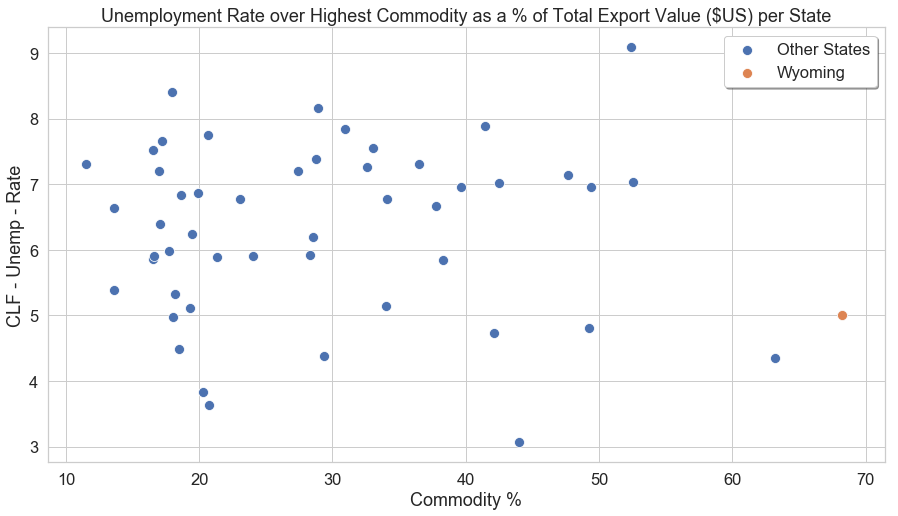

In [218]:
wyoming = commodity_unemp[commodity_unemp['State'] == 'Wyoming']
states = commodity_unemp.sort_values(['Commodity %'])

# calculating unemployment % below mean for state with highest commodity%
percent_below_mean = round((states['CLF - Unemp - Rate'].mean() - wyoming['CLF - Unemp - Rate'].item())/states['CLF - Unemp - Rate'].mean()*100,2)
print("Wyoming's unemployment rate is",percent_below_mean,"% below the mean")

sns.scatterplot(x = 'Commodity %', y = 'CLF - Unemp - Rate', data = states, s=100, label = 'Other States')
sns.scatterplot(x = 'Commodity %', y = 'CLF - Unemp - Rate', data = wyoming, s=100, label = 'Wyoming')

plt.legend( bbox_to_anchor=(1.00, 1.00), fancybox=True, shadow=True)
plt.title('Unemployment Rate over Highest Commodity as a % of Total Export Value ($US) per State')
plt.show()

<a id='q3a'></a>
### Q3 Answers

Wyoming has the highest % of total value wrapped up in one single commodity, with what seems to be mining related activities at 68.21% of the total value for that state. Wyoming's mean unemployment rate accorss all years is 5.01%, which is  21.82% lower than the national mean accross all years. So it would appear that for this one state having the highest % of total value for one commodity does reduce the unemployment rate. Looking at the graph the effect seems to be limited and further analysis (right below) reveals an rsquared of 0.002.

In [224]:
result_2 = states
result_2 = result_2.drop(result_2[result_2['State'] == "District of Columbia"].index)  # contains Nans so wont compute rsquared with DC in the dataset
result_2 = result_2.drop(result_2[result_2['State'] == "Los Angeles County"].index)
result_2 = result_2.drop(result_2[result_2['State'] == "New York city"].index)

x = result_2['Commodity %']
y = result_2['CLF - Unemp - Rate']
cor2 = np.corrcoef(x.astype(float), y)[0,1]

print("Rsquared for all states over commodity %:", round(cor2**2,3))

Rsquared for all states over commodity %: 0.002


### Tableau Graph
Same as for Q1 and Q2, I also created the graph in Tableau as a scatter plot. In this one I highlighted the state with the highest Commodity %, which was Wyoming.

<img src="q3.png">

#### <a href='#toc'>Back to Table of Contents</a>
______
<a id='q4'></a>
### Q4

In [225]:
sales_regions = pd.read_csv('SalesRegions.txt', sep=",")
sales_regions.rename(columns={'State':'StateCode'}, inplace=True)
state_codes = pd.read_excel(open(work_book,'rb'),sheet_name = 1)  # Pull data from excel
state_codes.rename(columns={'Name':'State'}, inplace=True)

states_regions_codes = pd.merge(state_codes, sales_regions, how='right', on=['StateCode'])

First a dataframe containing StateCode, State, and SaleRegion needs to be created from merging the codes and the regions.

In [226]:
states_regions_codes.head(2)

,StateCode,State,SalesRegion
0,AA,Armed Forces America,South Florida
1,AK,Alaska,Northwest


Then we can merge in the state unemployed dataframe from earlier in the document and sort the values by unemployement rate to reveal the SalesRegion with the highest unemploymenet rate.

In [229]:
states_regions_unemp = pd.merge(state_unemp, states_regions_codes, how='right', on=['State'])
states_regions_unemp = states_regions_unemp[['SalesRegion','CLF - Unemp - Rate']].groupby(['SalesRegion']).mean().reset_index()
states_regions_unemp.sort_values('CLF - Unemp - Rate',ascending=False).head(5)

,SalesRegion,CLF - Unemp - Rate
6,LA,8.40000
3,Great Lakes,7.88750
18,Southeast,7.60625
10,North Carolina,7.52500
4,Gulf Coast,7.27500


In [232]:
capitol = states_regions_unemp[states_regions_unemp['SalesRegion'] == 'Capitol']
print("Capitol SalesRegion Unemploymenet:", round(capitol['CLF - Unemp - Rate'].mean(),2))
print("Total SalesRegion Mean Unemploymenet:", round(employment['CLF - Unemp - Rate'].mean(),2))

Capitol SalesRegion Unemploymenet: 5.85
Total SalesRegion Mean Unemploymenet: 6.41


<a id='q4a'></a>

### Q4 Answer

LA is the SalesRegion with the highest unemployment. The capitol SalesRegion has an unemployment Rate of 5.85. And the total mean unemployement rate accross al years and all SalesRegions is 6.41.

#### <a href='#toc'>Back to Table of Contents</a>
______
<a id='q5'></a>


### Q5

In [236]:
# 66 Umbrellas, Walking-sticks, Riding-crops Etc, Parts
# 2017
export_umbrella = exports[exports["Commodity"] == "66 Umbrellas, Walking-sticks, Riding-crops Etc, Parts"]
export_umbrella_year = export_umbrella[export_umbrella["Year"] == 2017]
umbrella_region = pd.merge(export_umbrella_year, states_regions_codes, how='left', on=['State'])

umbrella_region = umbrella_region[['SalesRegion','Total Value ($US)']].groupby(['SalesRegion']).sum().reset_index()
umbrella_region[['SalesRegion','Total Value ($US)']].sort_values('Total Value ($US)',ascending = False).head(5)

,SalesRegion,Total Value ($US)
16,South Florida,16234350
14,Philadelphia,4243780
6,LA,4230815
17,South Texas,1020720
18,Southeast,776387


<a id='q5a'></a>

### Q5 Answer

The SalesRegion with the highest value of exports for Umbrellas, Walking-sticks, Riding-crops Etc, Parts for 2017 is South Florida.

#### <a href='#toc'>Back to Table of Contents</a>
______
<a id='q6'></a>


### Q6 Answer

1. Having total state GDP would help to analyze patters further.
2. Data on education would have enhanced the dataset. Education would impact employement in areas where high tech jobs dominate the gdp, yet do not impact much of the total value of exports, so comparing the GDP to total export value to employment.
3. The Data is incomplete in areas. Certain steps required dropping rows with nulls to compute rsquared. This is pretty normal though, and most data analysis will involve cleaning up data.
4. Spatial information could have enchanced the data, however Tableau has the ability to spatially graph data when it interprets an address (dataset has States in it).


#### <a href='#toc'>Back to Table of Contents</a>
______
<a id='q7'></a>


### Q7 Answer

Most difficult part is knowing I now have to recieve a phonecall from a Tableau rep for signing up for the 14 day desktop trial, as this PC did not have Tableau.

Also an ETL based workflow using Lavastorm or Alteryx, and graphing purely in Tableal would have made for a much more presentable format for this document. I chose a jupyter notebook because of how easy they make sharing the entire process. In this one document you can see my entire workflow.

#### <a href='#toc'>Back to Table of Contents</a>
______
<a id='q8'></a>


### Q8 Answer

In [239]:
employment.to_csv(r'C:\Users\Kerling\Desktop\IDEXX Sales Analytics Benchmark\employment_q8.csv')
exports.to_csv(r'C:\Users\Kerling\Desktop\IDEXX Sales Analytics Benchmark\exports_q8.csv')

We can plot the sum of each state's exports accorss all years and show on a map which states have the highest total values in exports. Here we see that Texas is by far the state with the highest total export value. 

<img src="q8_map1.png">

The data could also be plotted in a treemap to visualize states with total values >200bn $US

<img src="q8_map2.png">

The data can also be plotted with >2 dimensions. Here CNI Population is plotted over Total Value ($US) for the year 2017. Showing very strong relationship between the two. However, once 2017 unemployement is added into the mix we can see that there appears to be no relationship between the unemploymenet rate and pop/total value. 

<img src="q82.png">

#### <a href='#toc'>Back to Table of Contents</a>